<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/RNN_Quest_2_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#beforehand

In [1]:
import glob
import cv2
import keras,os
import tensorflow as tf
from os import listdir
from os.path import isfile, join
from keras.models import Sequential, load_model
from keras.layers import Dropout, Input, Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, AveragePooling2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import numpy as np
import pandas as pd

## helper

In [39]:
def get_image_information(main_target_path,sub_path ,class_list ,data_format ):
    info_array = []#np.array([[0,8]])
    column_names = ['class_x','name_x','row','column','channel','shape','main_target_path','sub_path']

    for class_name in class_list:
        path = os.path.join(os.sep,main_target_path,sub_path,class_name)
        img_path_list = glob.glob(path + data_format)

        for img_path in img_path_list:
            img = cv2.imread(img_path)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            info_array.append([class_name,os.path.split(img_path)[-1],img.shape[0],img.shape[1],img.shape[2],img.shape,main_target_path,sub_path])

    df = pd.DataFrame(data=info_array,columns= column_names)
    return df

In [2]:
import matplotlib.pyplot as plt

def history_plot_from_loss_acc(history, title):
  plt.figure(figsize=(10,5))

  train_loss_list = history.history['loss']
  train_accuracy = history.history['accuracy']
  val_loss_list = history.history['val_loss']
  val_accuracy_list = history.history['val_accuracy']
  x = history.epoch
  
  plt.subplot(1,2,1)
  plt.plot(x, train_loss_list)
  plt.plot(x, val_loss_list)
  plt.legend(['train_loss', 'val_loss'])
  plt.title(title+"_ LOSS")
  
  plt.subplot(1,2,2)
  plt.plot(x, train_accuracy)
  plt.plot(x, val_accuracy_list)
  plt.legend(['train_acc','val_accuracy'])
  plt.title(title+"_ ACCURACY")
  plt.show()

In [36]:
def create_result_df(y_predict,test_generator):
  """
  y_predict_vgg16 = y_predict
  test_generator = generator
  sub_path = 'test

  uses function:
  get_image_information(main_target_path=main_target_path,
            sub_path='test',
            class_list=artist_list,
            data_format=data_format)

  """
  y_predict = np.argmax(y_predict, axis=-1)
  pre_file_df = pd.DataFrame(data=[y_predict,test_generator.filenames]).T
  pre_file_df.columns = ['predict','class_name']

  df_test =get_image_information(main_target_path=main_target_path,sub_path='test',class_list=artist_list,data_format=data_format)
  df_test['class_name']=df_test.apply(lambda x: (str(x.class_x)+"/"+str(x.name_x)),axis=1)
  df_test = pd.merge(df_test, pre_file_df, on=["class_name", "class_name"])
  df_test['class_value'] = df_test.class_x.map(artist_class_name_dict)
  df_test['test_result'] = df_test.apply(lambda x: x.predict == x.class_value,axis = 1)

  df_groups = df_test.groupby('class_x').agg( class_sum =('class_x','count'),test_sum =('test_result','sum')).reset_index()
  df_groups['percent_all'] = (df_groups['class_sum']/df_groups['class_sum'].sum())*100
  df_groups['percent_test'] = (df_groups['test_sum']/df_groups['class_sum'])*100
  return df_groups

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

def plot_confusion_matrix_x(labels,predictions,classes_name):
  """
  example:
  predictions=max_predict # np.argmax(y_predict, axis=-1)
  labels=test_generator.classes
  classes_name = artist_list
  """
  con_mat = tf.math.confusion_matrix(labels=labels, predictions=np.argmax(predictions, axis=-1) ).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,index = classes_name,columns = classes_name)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [4]:
import glob
data_format = '/*.jpg'

def number_of_images_in_path(target_path,data_format):
    print(target_path)
    img_path_list = glob.glob(target_path + data_format)
           
    n = len(img_path_list)
    print(f'Number of images: {n}\n')



#import data

In [5]:
# mount google drive to access dataset
from google.colab import drive
drive.mount('/content/drive')
# change directory
%cd /content/
# create new local directory, i.e. on the current machine which you are connected to
!mkdir local_data   # could also be another name than local_data

Mounted at /content/drive
/content


In [46]:
!unzip '/content/drive/MyDrive/Copy_Material_AIDA_2021/_spec_ML3_wolfgang/Week_3/Fabritius.zip' -d local_data

Archive:  /content/drive/MyDrive/Copy_Material_AIDA_2021/_spec_ML3_wolfgang/Week_3/Fabritius.zip
replace local_data/Fabritius/Fabritius-07b496b2-45df-bb00-1cf7-d3fb4c2d86bd.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!unzip '/content/drive/MyDrive/Copy_Material_AIDA_2021/_spec_ML3_wolfgang/Week_3/resized.zip' -d local_data

In [8]:
cd /content/

/content


In [9]:
#!mkdir training_set
#!mkdir test_set

In [10]:
#ls -l

In [11]:
#rm -r ./best_model_simple/

In [41]:
#/content/local_data/resized
#data_path = 'C:/_dev/_aida/scientificProject/data/w_3/resized'
data_path = '/content/local_data/resized'

#/content/local_data/
#main_target_path = 'C:\\_dev\\_aida\\scientificProject\\data\\w_3\\'
main_target_path = '/content/local_data'


all_subdir = 'data_set'
train_subdir = 'train'
val_subdir = 'valid'
test_subdir = 'test'

train_size = 0.7
val_size = 0.15
test_size = 0.15

artist_list = ['Albrecht_Duerer','Caravaggio','Fabritius','Giotto_di_Bondone','Leonardo_da_Vinci','Michelangelo','Raphael','Rembrandt']
#artist_list = ['Albrecht_Duerer','Caravaggio','Giotto_di_Bondone','Leonardo_da_Vinci','Michelangelo','Raphael','Rembrandt']
data_format = '/*.jpg'


In [42]:
artist_name_class_dict = { i : artist_list[i] for i in range(0, len(artist_list) ) }
artist_class_name_dict = { artist_list[i] : i for i in range(0, len(artist_list) ) }

In [43]:
artist_class_name_dict

{'Albrecht_Duerer': 0,
 'Caravaggio': 1,
 'Fabritius': 2,
 'Giotto_di_Bondone': 3,
 'Leonardo_da_Vinci': 4,
 'Michelangelo': 5,
 'Raphael': 6,
 'Rembrandt': 7}

## import and organize images

In [44]:
for file_name in listdir(data_path):
    #print(file_name)

    #convert Albrecht_DuÔòá├¬rer
    if file_name.startswith('Albrecht_DuтХа├кrer'):
        new_file_name = file_name.replace('Albrecht_DuтХа├кrer','Albrecht_Duerer_x')
    elif file_name.startswith('Albrecht_Du╠Иrer'):
        new_file_name = file_name.replace('Albrecht_Du╠Иrer','Albrecht_Duerer_y')
    else:
        new_file_name = file_name

    for artist_name in artist_list:
        if new_file_name.startswith(artist_name):
            filepath = os.path.join(data_path,file_name)
            new_filepath = os.path.join(main_target_path,all_subdir,artist_name,new_file_name)

            #check dir and create
            if not os.path.exists(os.path.join(main_target_path,all_subdir,artist_name)):
                os.makedirs(os.path.join(main_target_path,all_subdir,artist_name))
            #move file
            try:
                os.rename(filepath, new_filepath)
            except:
                continue

In [47]:
!mv /content/local_data/Fabritius /content/local_data/data_set

In [48]:
for artist_name in artist_list:
    number_of_images_in_path(os.path.join(os.sep,main_target_path,all_subdir,artist_name),data_format)

/content/local_data/data_set/Albrecht_Duerer
Number of images: 656

/content/local_data/data_set/Caravaggio
Number of images: 55

/content/local_data/data_set/Fabritius
Number of images: 17

/content/local_data/data_set/Giotto_di_Bondone
Number of images: 119

/content/local_data/data_set/Leonardo_da_Vinci
Number of images: 143

/content/local_data/data_set/Michelangelo
Number of images: 49

/content/local_data/data_set/Raphael
Number of images: 109

/content/local_data/data_set/Rembrandt
Number of images: 262



## orginze in train,test and validate

In [49]:
from shutil import copyfile
from sys import exit

all_subdir = 'data_set'
train_subdir = 'train'
val_subdir = 'validation'
test_subdir = 'test'

train_size = 0.7
val_size = 0.15
test_size = 0.15

def number_of_images_in_path(target_path,data_format):
    print(target_path)
    img_path_list = glob.glob(target_path + data_format)

    n = len(img_path_list)
    print(f'Number of images: {n}\n')
    return img_path_list

def organize_by_copy_train_test_vaildation_dir(main_target_path,all_subdir,class_list,data_format,ml_subdir_list,train_size,test_size,validation_size):
    """
    :param main_target_path:
    :param all_subdir:
    :param class_list:
    :param data_format:
    :param ml_subdir_list:
    :param train_size:
    :param test_size:
    :param validation_size:
    :return:
    """
    assert(train_size+test_size+validation_size == 1)

    for ml_subdir in ml_subdir_list:
        if not os.path.exists(os.path.join(main_target_path, ml_subdir)):
            os.makedirs(os.path.join(main_target_path, ml_subdir))

    for class_name in class_list:
        img_path_list =  number_of_images_in_path(os.path.join(os.sep,main_target_path,all_subdir,class_name),data_format)

        #shuffle
        np.random.shuffle(img_path_list)
        #create class_dir
        for ml_subdir in ml_subdir_list:
            if not os.path.exists(os.path.join(main_target_path,ml_subdir,class_name)):
                os.makedirs(os.path.join(main_target_path,ml_subdir,class_name))

        #move images to class subdir
        train_stop = int(len(img_path_list) * train_size)
        validation_stop = train_stop + int(len(img_path_list) * validation_size)
        test_stop = validation_stop + int(len(img_path_list) * test_size)

        n = 0
        for imp_path in img_path_list:
            new_filepath = ''
            if n <= train_stop:
                new_filepath = os.path.join(main_target_path, ml_subdir_list[0], class_name, os.path.split(img_path_list[n])[-1])
            elif n <= validation_stop:
                new_filepath = os.path.join(main_target_path, ml_subdir_list[1], class_name, os.path.split(img_path_list[n])[-1])
            elif n <= test_stop:
                new_filepath = os.path.join(main_target_path, ml_subdir_list[2], class_name, os.path.split(img_path_list[n])[-1])

            # copy file
            source = img_path_list[n]
            target = new_filepath

            try:
                copyfile(source, target)
                n += 1
            except IOError as e:
                print("Unable to copy file. %s" % e)
                continue


organize_by_copy_train_test_vaildation_dir(main_target_path=main_target_path,all_subdir=all_subdir,
                                   class_list=artist_list,data_format=data_format,
                                   ml_subdir_list=[train_subdir,val_subdir,test_subdir],
                                   train_size=train_size,
                                   validation_size=val_size,
                                   test_size=test_size)

/content/local_data/data_set/Albrecht_Duerer
Number of images: 656

/content/local_data/data_set/Caravaggio
Number of images: 55

/content/local_data/data_set/Fabritius
Number of images: 17

Unable to copy file. [Errno 2] No such file or directory: ''
/content/local_data/data_set/Giotto_di_Bondone
Number of images: 119

Unable to copy file. [Errno 2] No such file or directory: ''
/content/local_data/data_set/Leonardo_da_Vinci
Number of images: 143

/content/local_data/data_set/Michelangelo
Number of images: 49

/content/local_data/data_set/Raphael
Number of images: 109

/content/local_data/data_set/Rembrandt
Number of images: 262



# begin with VGG16

Let's improve our painter classifier! It's always a good idea to look at how other people have tackled a problem. 

Here are some links: 

http://cs231n.stanford.edu/reports/2017/pdfs/406.pdf

http://cs231n.stanford.edu/reports/2017/pdfs/410.pdf






https://github.com/keras-team/keras/issues/3338

##1 add Carel Fabritius

I also want you to implement another painter into your dataset - Carel Fabritius, a scolar of Rembrandt. The reason is, that there are only 17 paintings of Fabritius left. Let's (along with other things) see how our model performs on such a small class. 

In [50]:
in_shape = (224,224,3)

In [51]:
train_gen = ImageDataGenerator(rescale=1./255.)
validation_gen = ImageDataGenerator(rescale=1./255.)
test_gen = ImageDataGenerator(rescale=1./255.)

In [52]:
train_generator = train_gen.flow_from_directory(directory="/content/local_data/train",target_size=(224,224),batch_size=16,shuffle=True,seed=42)
valid_generator = validation_gen.flow_from_directory(directory="/content/local_data/validation",target_size=(224,224),batch_size=16,shuffle=False,seed=42)
test_generator = test_gen.flow_from_directory(directory="/content/local_data/test", target_size=(224,224),batch_size=16,shuffle=False,seed=42)

Found 1286 images belonging to 8 classes.
Found 385 images belonging to 8 classes.
Found 388 images belonging to 8 classes.


In [56]:
import tensorflow. keras as keras
vgg16_model = keras.applications.VGG16()

In [57]:
vgg16_model = keras.applications.vgg16.VGG16(
  weights='imagenet',
  include_top=False,
  input_shape=in_shape)

# freeze the weights
vgg16_model.trainable = False

In [58]:
model_vgg16_c = Sequential()
for layer in vgg16_model.layers:
  model_vgg16_c.add(layer)

In [59]:
for layer in model_vgg16_c.layers:
  layer.trainable = False

In [64]:
model_vgg16_c.add(Flatten())
model_vgg16_c.add(Dense(256,activation='relu'))
model_vgg16_c.add(Dropout(0.5))
model_vgg16_c.add(Dense(8,activation='softmax'))
model_vgg16_c.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
"""
TODO use api

# Top Model input todo
a = Input(shape=(7,7,2048))
x = Flatten()(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024,activation='softmax')(x)

top_model = Model(inputs=a, outputs=x)

#top_model.summary()

inp = Input(shape=in_shape)
y = vgg16_model(inp)
y = top_model(y)
final_model = Model(inp,y)

final_model.summary()

"""


In [65]:
model_vgg16_c.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics='accuracy') 

In [66]:
mcp_2 = ModelCheckpoint('keras_applications_VGG16', monitor='val_accuracy', save_best_only=True, save_weights_only=False, verbose=1)

In [74]:
history_model_vgg16_c = model_vgg16_c.fit(train_generator,validation_data = valid_generator,epochs=15,callbacks=[mcp_2])    

Epoch 1/15
81/81 [==============================] - 13s 166ms/step - loss: 0.9519 - accuracy: 0.7278 - val_loss: 0.8905 - val_accuracy: 0.7429

Epoch 00001: val_accuracy improved from 0.74026 to 0.74286, saving model to keras_applications_VGG16
INFO:tensorflow:Assets written to: keras_applications_VGG16/assets
Epoch 2/15
81/81 [==============================] - 13s 164ms/step - loss: 0.9277 - accuracy: 0.7286 - val_loss: 0.8576 - val_accuracy: 0.7429

Epoch 00002: val_accuracy did not improve from 0.74286
Epoch 3/15
81/81 [==============================] - 13s 164ms/step - loss: 0.8932 - accuracy: 0.7325 - val_loss: 0.8406 - val_accuracy: 0.7403

Epoch 00003: val_accuracy did not improve from 0.74286
Epoch 4/15
81/81 [==============================] - 13s 162ms/step - loss: 0.8675 - accuracy: 0.7333 - val_loss: 0.8167 - val_accuracy: 0.7429

Epoch 00004: val_accuracy did not improve from 0.74286
Epoch 5/15
81/81 [==============================] - 13s 162ms/step - loss: 0.8575 - accurac

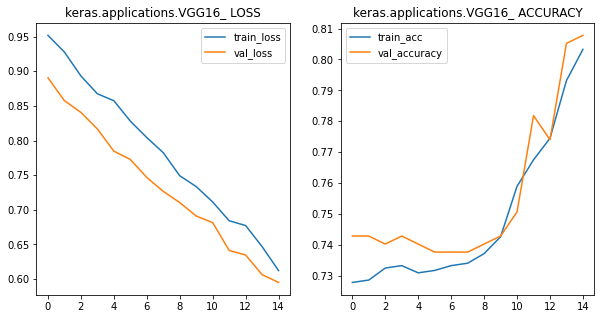

In [75]:
history_plot_from_loss_acc(history_model_vgg16_c,'keras.applications.VGG16')

In [69]:
best_keras_applications_VGG16_model = load_model('keras_applications_VGG16')

#### result

In [70]:
y_eval = best_keras_applications_VGG16_model.evaluate(test_generator)

25/25 [==============================] - 3s 126ms/step - loss: 0.9651 - accuracy: 0.7371


In [71]:
y_predict_vgg16_model = best_keras_applications_VGG16_model.predict(test_generator)

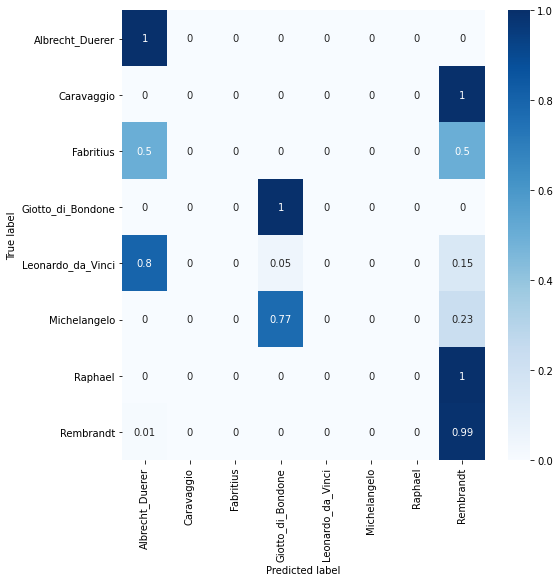

In [72]:
plot_confusion_matrix_x(test_generator.classes,y_predict_vgg16_model,artist_list)

In [73]:
create_result_df(y_predict_vgg16_model,test_generator)

,class_x,class_sum,test_sum,percent_all,percent_test
0,Albrecht_Duerer,184,184,47.422680,100.000000
1,Caravaggio,16,0,4.123711,0.000000
2,Fabritius,2,0,0.515464,0.000000
3,Giotto_di_Bondone,32,32,8.247423,100.000000
4,Leonardo_da_Vinci,40,0,10.309278,0.000000
5,Michelangelo,13,0,3.350515,0.000000
6,Raphael,30,0,7.731959,0.000000
7,Rembrandt,71,70,18.298969,98.591549


##2 use only crop samples

Now restructure your dataset so that you can implement Nitin Vishwanathans approach: Take one center crop and one random crop of each image. To do so, you need to write two functions, one to get a center crop of your image dimensions and one to get a random crop. 

### crop

 inspired from

https://jkjung-avt.github.io/keras-image-cropping/

https://gist.github.com/rstml/bbd491287efc24133b90d4f7f3663905

In [ ]:
"""
width, height = img.size

            if crop == "center":
                left_corner = int(round(width/2)) - int(round(target_width/2))
                top_corner = int(round(height/2)) - int(round(target_height/2))
                return img.crop((left_corner, top_corner, left_corner + target_width, top_corner + target_height))
            elif crop == "random":
                left_shift = random.randint(0, int((width - target_width)))
                down_shift = random.randint(0, int((height - target_height)))
                return img.crop((left_shift, down_shift, target_width + left_shift, target_height + down_shift))

def get_center_crop():
  target_width = target_size[1]
  target_height = target_size[0]
  left_corner = int(round(width/2)) - int(round(target_width/2))
  top_corner = int(round(height/2)) - int(round(target_height/2))
  return img.crop((left_corner, top_corner, left_corner + target_width, top_corner + target_height))                
"""                

In [ ]:
def get_center_crop(img):
  #target_size=(224,224)
  #crop_size=(224,224)
  #dy, dx = crop_size
  dy = 224
  dx = 224

  height, width = img.shape[0], img.shape[1]
  print(f"img.shape{height,width}")
  
  x = (width - dx + 1) // 2
  y = (height - dy + 1) // 2
  return img[y:(y+dy), x:(x+dx), :]

In [ ]:
def get_random_crop(img):
# Note: image_data_format is 'channel_last'
 assert img.shape[2] == 3
 height, width = img.shape[0], img.shape[1]
 #dy, dx = random_crop_size
 dy = 224
 dx = 224
 x = np.random.randint(0, width - dx + 1)
 y = np.random.randint(0, height - dy + 1)
 return img[y:(y+dy), x:(x+dx), :]

In [ ]:
def get_random_crop()

In [ ]:
# Restructure your data set. 

In [ ]:
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]


def crop_generator(batches, crop_length):
    """Take as input a Keras ImageGen (Iterator) and generate random
    crops from the image batches generated by the original iterator.
    """
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

In [ ]:
def center_crop(x, center_crop_size, **kwargs):
    centerw, centerh = x.shape[1]//2, x.shape[2]//2
    halfw, halfh = center_crop_size[0]//2, center_crop_size[1]//2
    return x[:, centerw-halfw:centerw+halfw,centerh-halfh:centerh+halfh]

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255.)
validation_gen = ImageDataGenerator(rescale=1./255.)
test_gen = ImageDataGenerator(rescale=1./255.)

In [ ]:
#train_gen.config['center_crop_size'] = (224, 224)

In [ ]:
#datagenX.set_pipeline([random_crop, random_transform, standardize, center_crop])

NOTE: you would not necessarily need to restructure the data set - if you wrote a custom data_generator who does the cropping for you. And check whether keras has this under the hood. But you might be unlucky...

### crop Data Augmentation (look at what keras has under the hood)

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        brightness_range = (0.7, 1.3),
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=get_center_crop,
        rotation_range=359)


In [ ]:
train_generator = train_gen.flow_from_directory(directory="/content/local_data/train",batch_size=16,shuffle=True,seed=42)
#train_generator = train_gen.flow_from_directory(directory="/content/local_data/train",target_size=(224,224),batch_size=16,shuffle=True,seed=42)

In [ ]:
next_gen = train_generator.next()
type(next_gen)

In [ ]:
type(next_gen)

In [ ]:
#train_generator = train_gen.flow_from_directory(directory="/content/local_data/train",target_size=(224,224),batch_size=16,shuffle=True,seed=42)
valid_generator = validation_gen.flow_from_directory(directory="/content/local_data/validation",target_size=(224,224),batch_size=16,shuffle=False,seed=42)
test_generator = test_gen.flow_from_directory(directory="/content/local_data/test", target_size=(224,224),batch_size=16,shuffle=False,seed=42)

In [ ]:
in_shape = (224,224,3)

In [ ]:
learning_rate = 0.0001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model = Sequential()
model.add(Conv2D(32, (3,3), padding='valid',activation='relu', input_shape=in_shape))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3), padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics='accuracy') 

In [ ]:
mcp_1 = ModelCheckpoint('best_model_simple', monitor='val_accuracy', save_best_only=True, save_weights_only=False, verbose=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [ ]:
history_model = model.fit(train_generator,validation_data = valid_generator,epochs=1,callbacks=[mcp_1,early])    

In [ ]:
history_plot_from_loss_acc(history_model,'best_model_simple')

In [ ]:
best_simple_model = load_model('best_model_simple')
best_simple_model.summary()

In [ ]:
best_simple_model.evaluate(test_generator)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_gen.classes, pred, target_names=test_gen.class_indices))

#feed them with the crops

Now take the models from RNN_Quest_1 - and feed them with the crops, rather than the resized images!

What is the performance? Did it improve? 

#Rethink the data preprocessing procedure

Rethink the data preprocessing procedure. You missed a great chance (and so did Vishwanathan)! What could it be.

Really DO think about it - and when you have (or maybe haven't despite trying hard) came up with a solution, go to RNN_Quest_3!

## create more random samples

## retune the hyperparameter

You may need to also retune the hyperparameters. Try and get the best model you can on weighted accuracy. What is the performance of this model for Carel Fabritius? What is the unweighted accuracy - and how big is the difference?

## compare with resnet 50